In [11]:
!git clone https://github.com/stereifberger/master-s-thesis.git

Cloning into 'master-s-thesis'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 59.66 KiB | 7.46 MiB/s, done.


# 1 Libraries and Utilities

In [21]:
import sys
sys.path.append('/content/master-s-thesis')
import utils
import run_learning

In [ ]:
def flatten(matrix = list):
  return(list(pd.core.common.flatten(matrix)))

In [ ]:
"""Pad sublists of lists to same length."""
def pad(list_1 = list, list_2 = list):
  for sublist in list_1:
    while len(sublist) < len(max(list_2, key = len)):
      sublist.append(0)
  for sublist in list_2:
    while len(sublist) < len(max(list_2, key = len)):
      sublist.append(0)
  return list_1, list_2

# 2 Training data generation classes

In [ ]:
class Premises:
  def __init__(self,
               term_num = int,
               sample_size = int,
               span_arg_num = list):
    self.term_num = term_num
    self.terms = list(range(1, term_num + 1))
    self.sample_size = sample_size
    self.span_arg_num = span_arg_num
    self.premises = self.input_gen()

  def wff_gen(self):
    arg_num = rd.randint(*self.span_arg_num)
    arguments = rd.sample(self.terms, arg_num)
    # Optionally some logic for building well formed formulas.
    return arguments

  def input_gen(self):
    premises = []
    while len(premises) < self.sample_size:
        random_premises = self.wff_gen()
        if random_premises not in premises:
          premises.append(random_premises)
    return premises

In [ ]:
class Derivation:
  def __init__(self,
               term_num = int,
               premises = list,
               nonterms = list,
               span_iterations = list):
    self.term_num = term_num
    self.premises = premises
    self.nonterms = nonterms
    self.span_iterations = span_iterations
    self.recursion_task = self.recursion_task()

  def X_gen(self, derivation, premise):
      conclusion = derivation[-1]
      X = flatten([premise, self.term_num + 1, derivation[-1]])
      return X

  def recursion_task(self):
    y = []
    X = []
    for derivation in self.premises:
      derivation_new = []
      iterations = range(rd.randint(*self.span_iterations))
      for iteration in iterations:
        filtered_nonterms = []
        for nonterm in nonterms:
          arg_num = nonterm.__code__.co_argcount # Line by GPT.
          if arg_num <= len(derivation):
            filtered_nonterms.append(nonterm)
        nonterm = rd.choice(filtered_nonterms)
        arg_num = nonterm.__code__.co_argcount
        args = rd.sample(flatten(derivation), arg_num)
        derived = nonterm(*args)
        derivation_new.append(derived)
        if iteration == 0:
          premise = derivation
      y.append(flatten(derivation_new))
      X.append(self.X_gen(derivation_new, premise))
    return X, y

In [ ]:
class Network_Training:
  def __init__(self,
               self.hidden = int
               self.hidden_dimensions = int
               self.activation = str
               ):
    self.network = self.network()
    self.hidden = hidden
    self.hidden_dimension = hidden_dimension

  """A function with witch architecture and parameters are selected."""
  def network(architecture = str, features_number = int, dim1 = int, dim2 = int):
    """Neural network from towardsdatascience"""
    model = Sequential()
    if architecture == "forward":
      model.add(Dense(16, input_dim=features_number, activation=self.activation))
      for i in range(self.hidden_layers):
            model.add(Dense(self.hidden_dimension, activation=self.activation)) #GPT
      model.add(Dense(features_number, activation=’softmax’))
    if architecture == "rnn":
      model.add(SimpleRNN(128, input_shape=(dim1,dim2), return_sequences = True))
      model.add(SimpleRNN(256, return_sequences = True))
      model.add(SimpleRNN(256, return_sequences = True))
      model.add(SimpleRNN(256, return_sequences = True))
      model.add(SimpleRNN(128, return_sequences = False))
      model.add(Dense(dim1*dim2, activation='sigmoid'))
      model.build()
    if architecture == "lstm":
      model.add(LSTM(units=50, input_shape=(dim1,dim2)))
      model.add(Dense(dim1*dim2))
    return model

def train(model_name = str,
          term_num = int,
          nonterms = list,
          iter_range = list,
          sample_size = int,
          max_length = int):
  num_classes = term_num + 2
  X_y = Derivation(term_num = 4, premises = premises_data, nonterms = nonterms, span_iterations = [1,9])
  X, y = X_y.recursion_task
  X, y = pad(X,y)
  X = to_categorical(X, num_classes)
  y = to_categorical(y, num_classes)
  if model_name == "forward":
    X = out(X)
  y = out(y)
  X = np.array(X)
  y = np.array(y)
  global X_test
  global y_test
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
  features_number = X.shape[1]
  if model_name == "rnn" or model_name == "lstm":
    dim1 = X.shape[1]
    dim2 = X.shape[2]
  else:
    dim1 = 0
    dim2 = 0
  global model
  model = change_model(model_name, features_number, dim1, dim2)
  model.compile(loss="mse", optimizer='adam', metrics=['mae'])
  global history
  history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=64)

SyntaxError: invalid character '’' (U+2019) (<ipython-input-190-438bffc1fc59>, line 19)

In [ ]:
premises_data = Premises(term_num = 8, sample_size = 10, span_arg_num = [1,3])
premises_data = premises_data.premises
#print(f"Input: {premises_data}")
X_y = Derivation(term_num = 4, premises = premises_data, nonterms = nonterms, span_iterations = [1,9])
X, y = X_y.recursion_task
pad(X,y)
print(f"X: {X}")
print(f"y: {y}")

X: [[5, 4, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 8, 1, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0], [6, 8, 4, 5, 6, 8, 0, 0, 0, 0, 0, 0, 0], [8, 7, 5, 8, 7, 0, 0, 0, 0, 0, 0, 0, 0], [3, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [7, 5, 5, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 7, 6, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0]]
y: [[4, 5, 5, 4, 4, 4, 5, 4, 0, 0, 0, 0, 0], [5, 1, 8, 8, 1, 8, 5, 0, 0, 0, 0, 0, 0], [6, 8, 8, 6, 6, 8, 0, 0, 0, 0, 0, 0, 0], [8, 8, 7, 8, 8, 7, 7, 8, 7, 7, 8, 8, 7], [3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0], [5, 7, 7, 5, 7, 7, 5, 7, 7, 0, 0, 0, 0], [6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0], [5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0], [7, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


# 3 Network class

In [ ]:
# https://favtutor.com/blogs/partition-list-python
# generator
def partition(lst, size):
    for i in range(0, len(lst), size):
        yield lst[i : i+size]

# Test

In [ ]:
"""Define the nonterminals as lambda functions of terms and list them"""
r1 = lambda term: term
r2 = lambda term1, term2: [int(term1), (term2)]
nonterms = [r1, r2]

In [ ]:
def out(y):
  new = []
  for x in y:
    x = flatten(x)
    new.append(x)
  return new

# 3 Training

In [ ]:
def train(model_name = str,
          term_num = int,
          nonterms = list,
          iter_range = list,
          sample_size = int,
          max_length = int):
  num_classes = term_num + 2
  X_y = Derivation(term_num = 4, premises = premises_data, nonterms = nonterms, span_iterations = [1,9])
  X, y = X_y.recursion_task
  X, y = pad(X,y)
  X = to_categorical(X, num_classes)
  y = to_categorical(y, num_classes)
  if model_name == "forward":
    X = out(X)
  y = out(y)
  X = np.array(X)
  y = np.array(y)
  global X_test
  global y_test
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
  features_number = X.shape[1]
  if model_name == "rnn" or model_name == "lstm":
    dim1 = X.shape[1]
    dim2 = X.shape[2]
  else:
    dim1 = 0
    dim2 = 0
  global model
  model = change_model(model_name, features_number, dim1, dim2)
  model.compile(loss="mse", optimizer='adam', metrics=['mae'])
  global history
  history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=64)

In [ ]:
train(model_name = "rnn",
      term_num = 4,
      nonterms = nonterms,
      iter_range = [1,4],
      sample_size = 50,
      max_length = 5)

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 0.2674 - mae: 0.4996 - val_loss: 0.1887 - val_mae: 0.4118
Epoch 2/200
1/1 [==============================] - 0s 87ms/step - loss: 0.1937 - mae: 0.4142 - val_loss: 0.1616 - val_mae: 0.3741
Epoch 3/200
1/1 [==============================] - 0s 85ms/step - loss: 0.1607 - mae: 0.3699 - val_loss: 0.1418 - val_mae: 0.3518
Epoch 4/200
1/1 [==============================] - 0s 80ms/step - loss: 0.1392 - mae: 0.3462 - val_loss: 0.1290 - val_mae: 0.3349
Epoch 5/200
1/1 [==============================] - 0s 76ms/step - loss: 0.1259 - mae: 0.3273 - val_loss: 0.1167 - val_mae: 0.3168
Epoch 6/200
1/1 [==============================] - 0s 85ms/step - loss: 0.1139 - mae: 0.3089 - val_loss: 0.1061 - val_mae: 0.2985
Epoch 7/200
1/1 [==============================] - 0s 77ms/step - loss: 0.1041 - mae: 0.2926 - val_loss: 0.0972 - val_mae: 0.2827
Epoch 8/200
1/1 [==============================] - 0s 92ms/step - loss: 0.0959 - mae: 0.2783

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

In [ ]:
np.array([flatten(to_categorical([2,3,4,2,3], 6))])

In [ ]:
array = model.predict(np.array([to_categorical([3,1,5,1,0], 6)]))
array_new = []
for i in array[0]:
  if i < 0.5:
    array_new.append(0)
  else:
    array_new.append(1)
n = 6
array_new = [array_new[i:i + n] for i in range(0, len(array_new), n)]
array_new = argmax(array_new, axis=1)
print(array_new)

In [ ]:
X, y = training_data_gen(term_symb_numb = 4, nonterminals = nonterminals, iter_range = [1,4], sample_size = 100, max_length = 6)

In [ ]:
X, y = training_data_gen(term_symb_numb = 4, nonterminals = nonterminals, iter_range = [2,4], sample_size = 20, max_length = 6)
X, y = pad(X, y)

concatenated_dataset = np.empty((20, 2, 6))

# Assign the values from the original datasets
concatenated_dataset[:, 0, :] = X
concatenated_dataset[:, 1, :] = y
concatenated_dataset

In [ ]:

a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

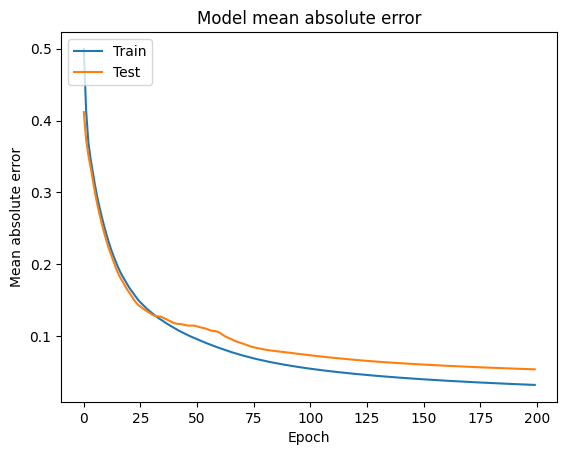

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mean absolute error')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

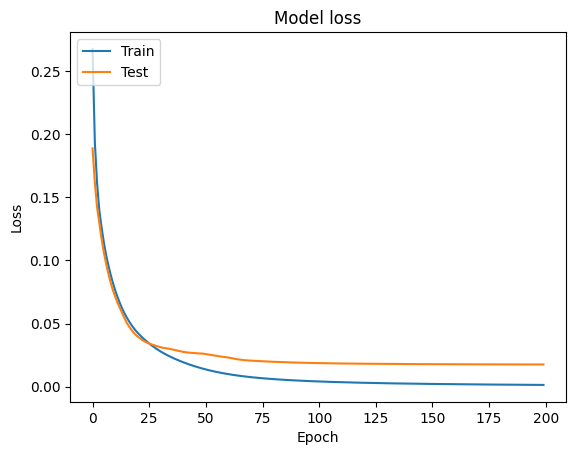

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()